# **Homework 1b**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import classlib4334

%config InlineBackend.figure_format = "retina"

## Question 2

(a) Plot all `hw-01b-datasetX.xlsx` files

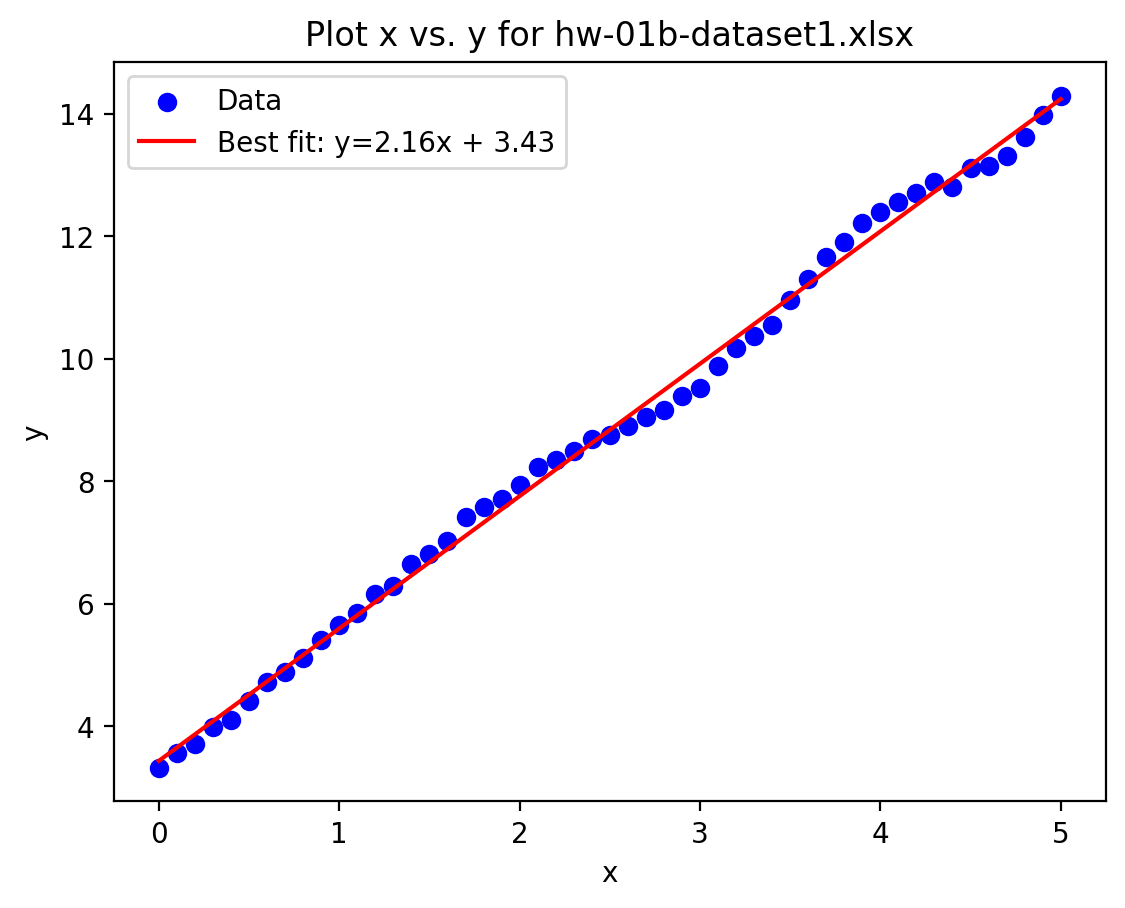

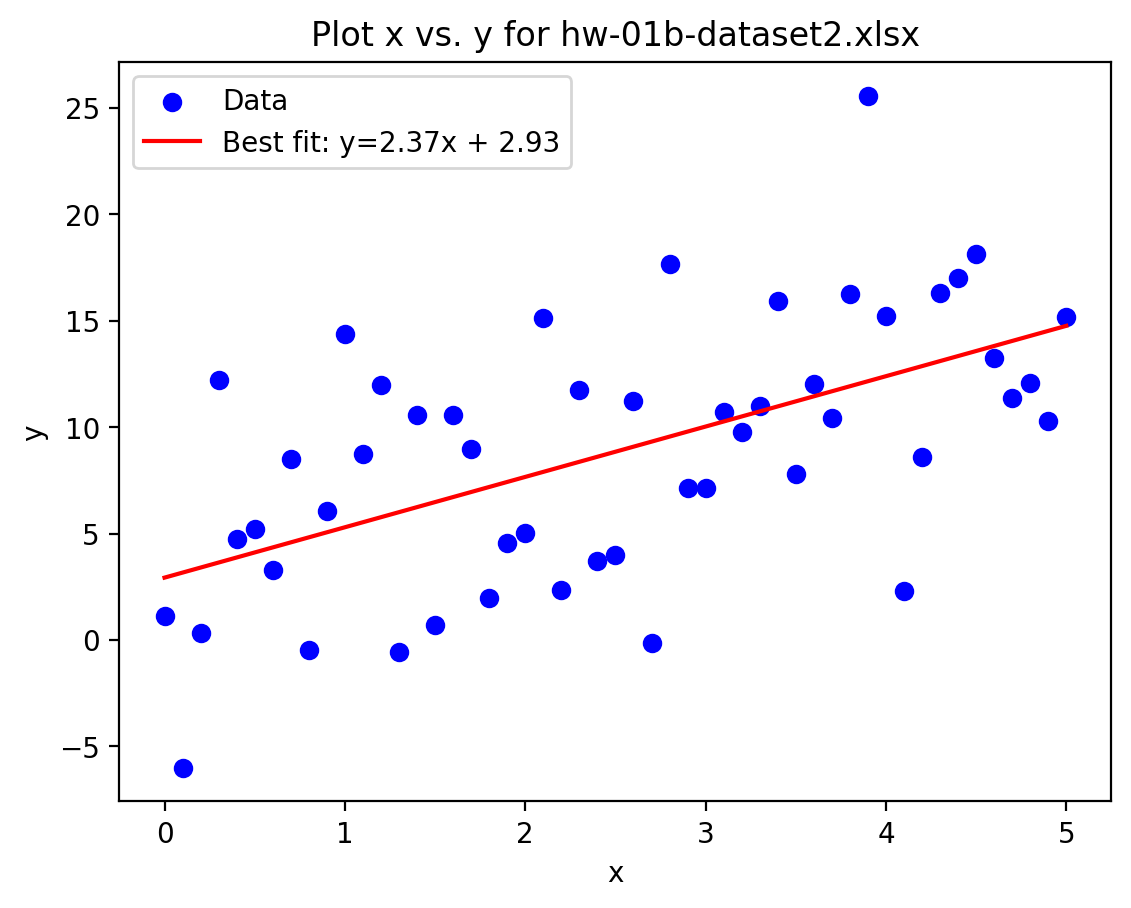

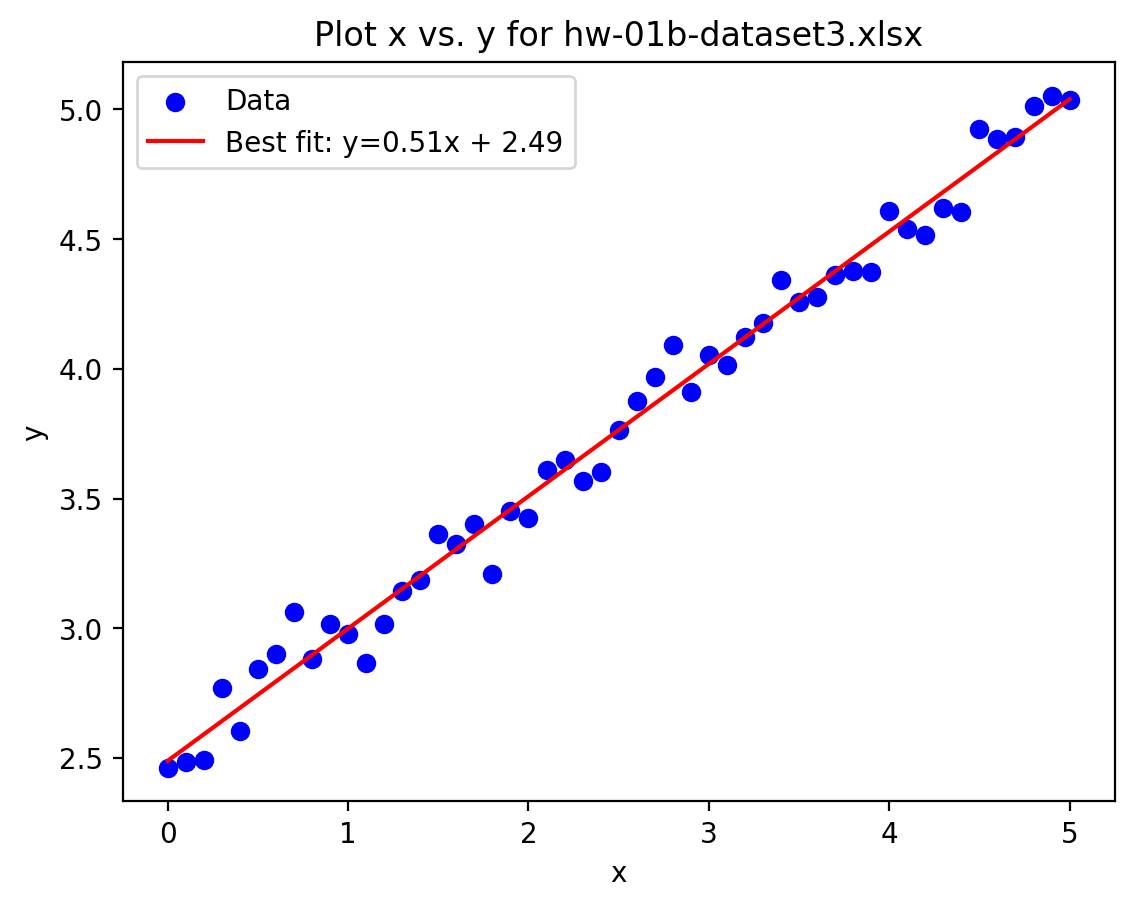

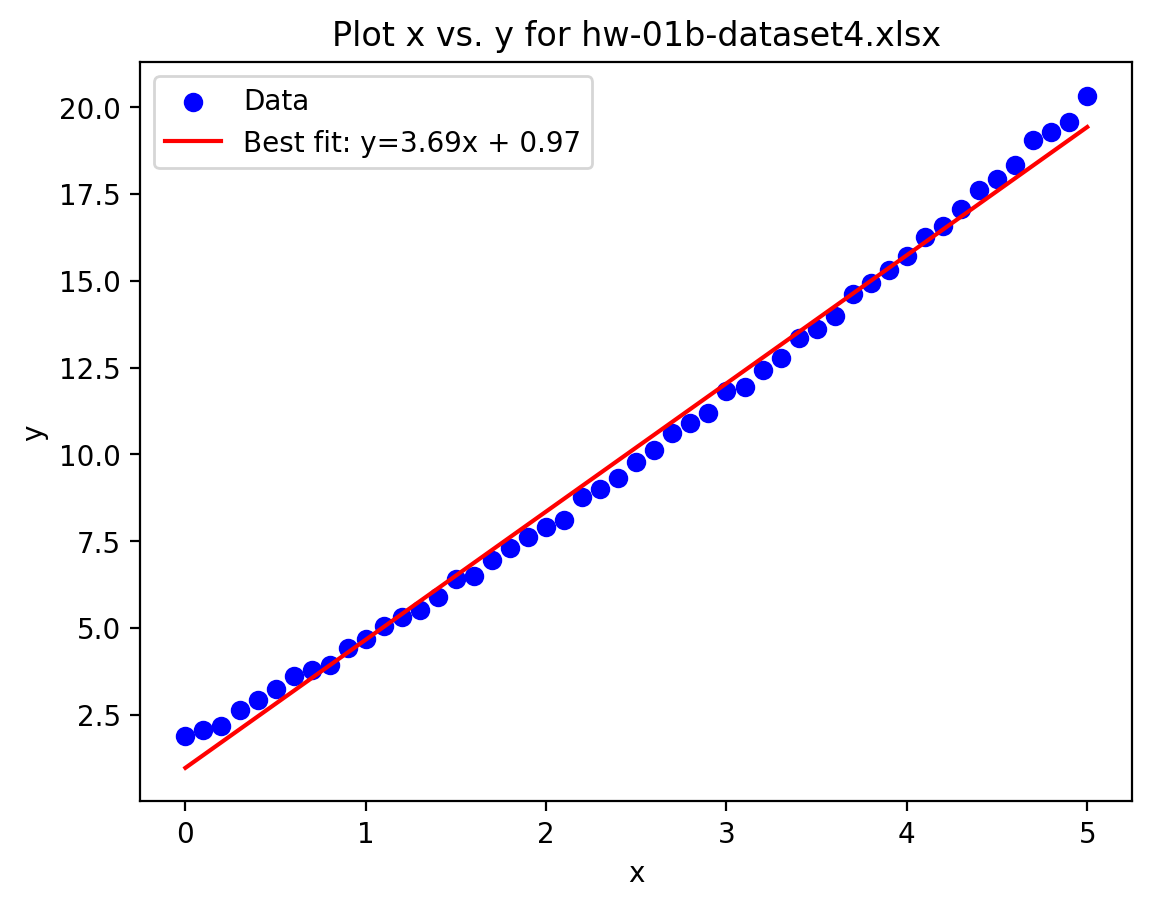

In [18]:
for idx in [1,2,3,4]:
    df: pd.DataFrame = pd.read_excel(f"hw-01b-datasets/hw-01b-dataset{idx}.xlsx")
    fig, ax = plt.subplots()
    ax.set_title(f"Plot x vs. y for hw-01b-dataset{idx}.xlsx")

    # scatter plot
    ax.scatter(df["x"], df["y"], label="Data", color='blue')
    
    # compute line of best fit
    m, b = np.polyfit(df["x"], df["y"], 1)

    # plot line of best fit
    ax.plot(df["x"], m*df["x"] + b, color='red', label=f'Best fit: y={m:.2f}x + {b:.2f}')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    fig.savefig(f"plots/plot_dataset{idx}.png")

(b) Plot UVR and EVR of each dataset, and plot standardized residual. 

For hw-01b-dataset1.xlsx
UVR: 0.0035
EVR: 0.9965

5 largest outliers for hw-01b-dataset1.xlsx:
x: 3.0, y: 9.52904250194062, Standardized Residual: -2.0432
x: 3.9, y: 12.22536486696067, Standardized Residual: 1.8867
x: 2.8, y: 9.169807562894526, Standardized Residual: -1.6600
x: 1.7, y: 7.417973732606641, Standardized Residual: 1.6201
x: 4.0, y: 12.39065736459639, Standardized Residual: 1.6201


For hw-01b-dataset2.xlsx
UVR: 0.6725
EVR: 0.3275

5 largest outliers for hw-01b-dataset2.xlsx:
x: 3.9, y: 25.56521277758833, Standardized Residual: 2.6599
x: 4.100000000000001, y: 2.30233444585973, Standardized Residual: -2.0496
x: 2.7, y: -0.1305032455577084, Standardized Residual: -1.8751
x: 0.1, y: -6.003308519937952, Standardized Residual: -1.8199
x: 1.0, y: 14.3546011233964, Standardized Residual: 1.7969


For hw-01b-dataset3.xlsx
UVR: 0.0137
EVR: 0.9863

5 largest outliers for hw-01b-dataset3.xlsx:
x: 0.7000000000000001, y: 3.062273216453427, Standardized Residual: 2.4212
x: 1.8, y: 3.2086

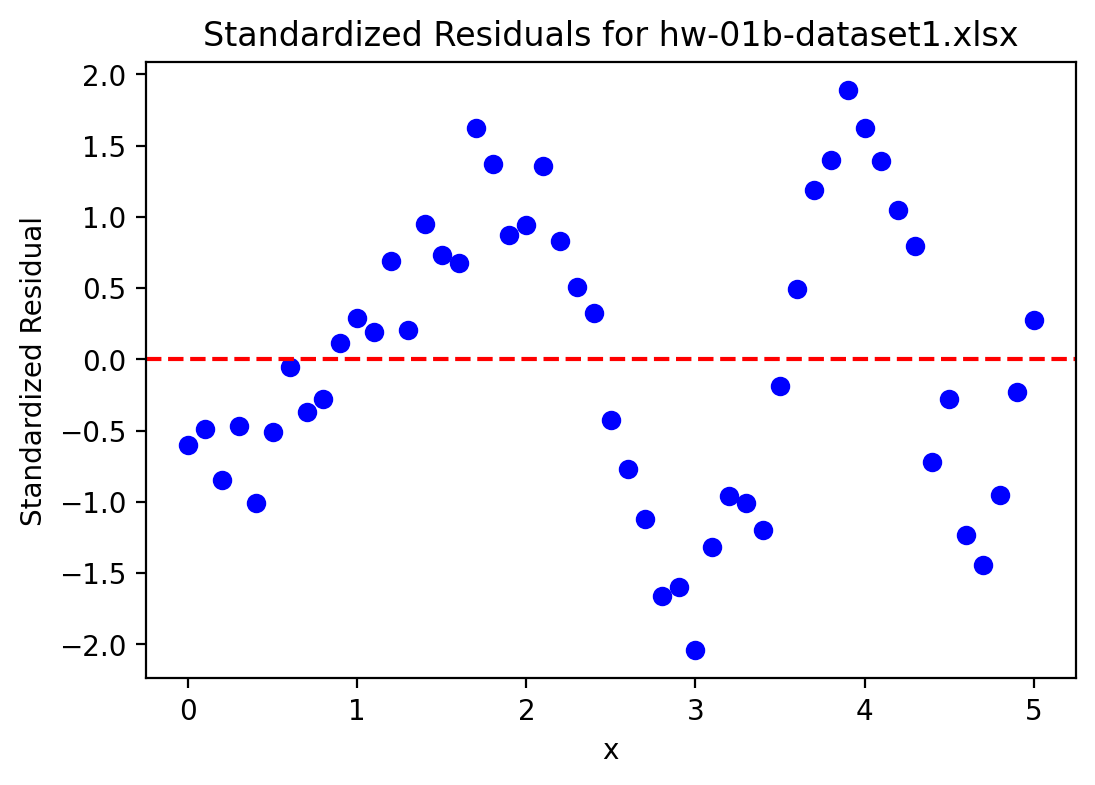

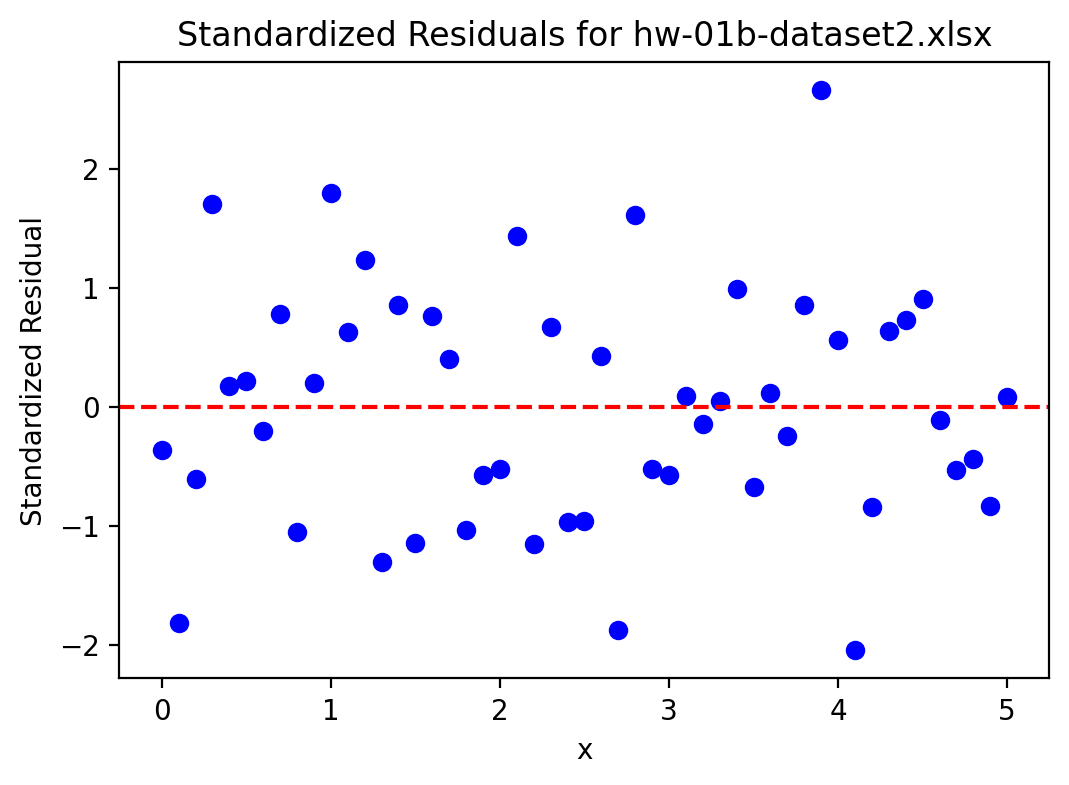

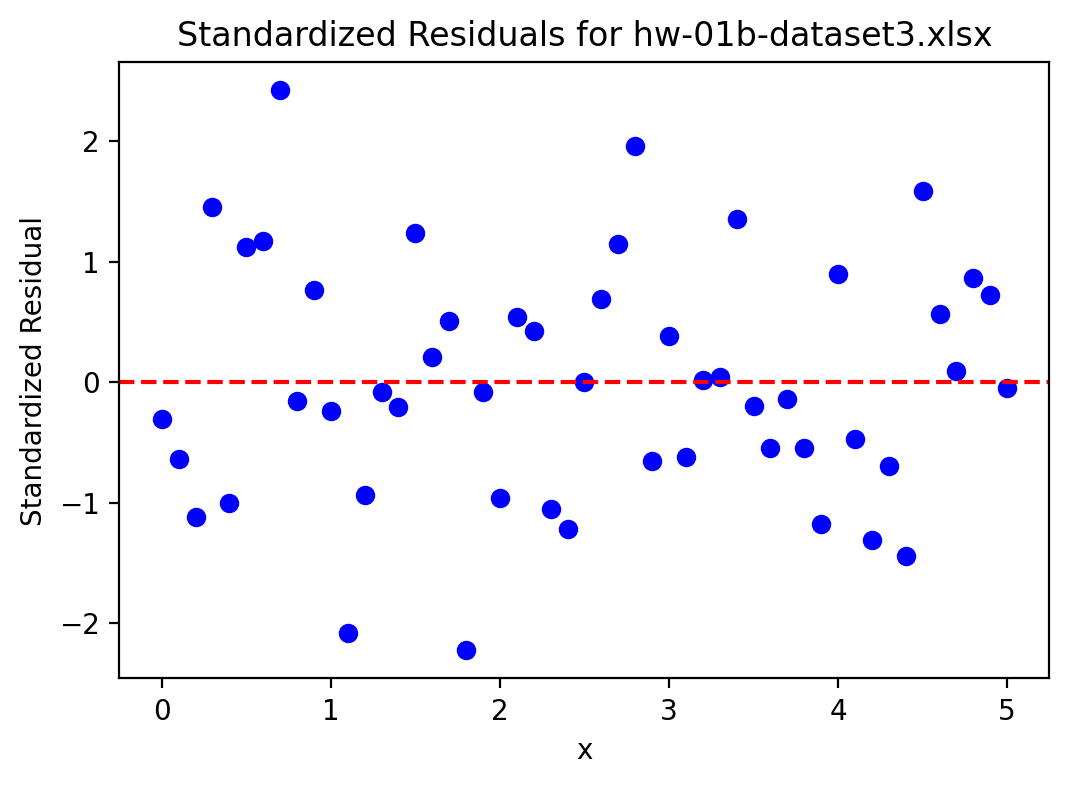

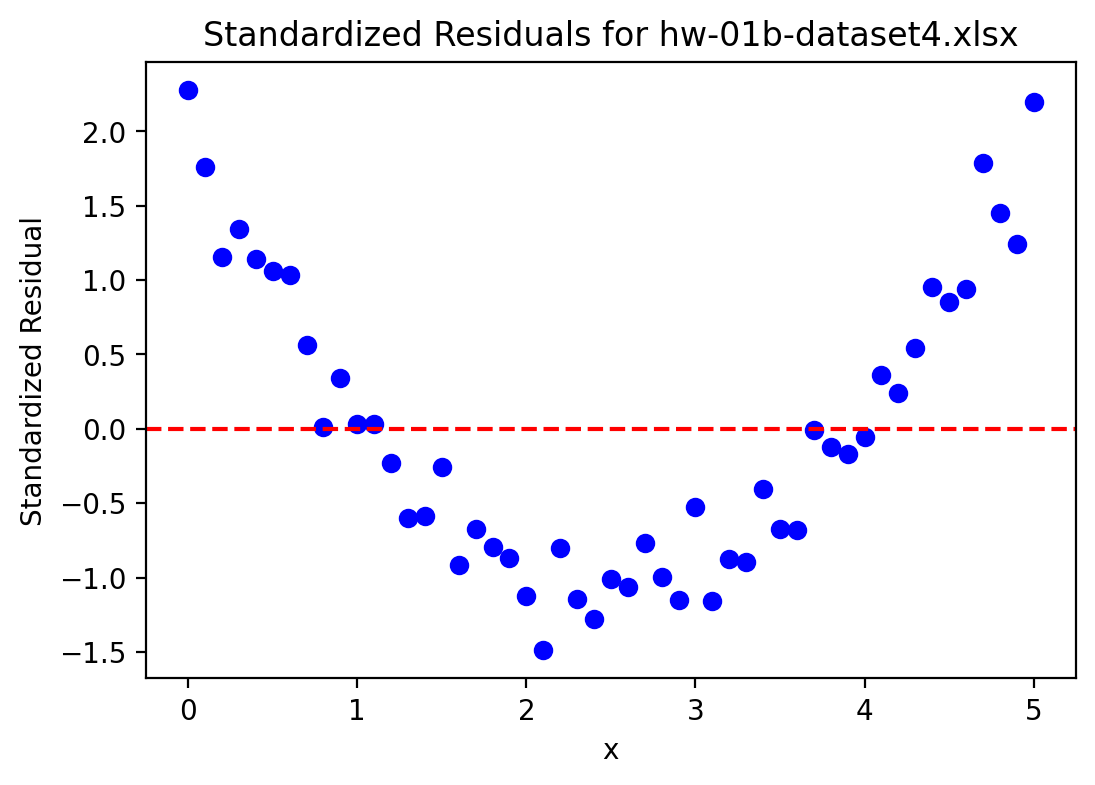

In [22]:
for idx in [1,2,3,4]:
    df: pd.DataFrame = pd.read_excel(f"hw-01b-datasets/hw-01b-dataset{idx}.xlsx")

    # compute line of best fit
    m, b = np.polyfit(df["x"], df["y"], 1)

    # Compute residuals
    y_pred = m * df["x"] + b
    residuals = df["y"] - y_pred

    # Standardized residuals
    std_residuals = (residuals - residuals.mean()) / residuals.std()

    # Calculate UVR and EVR
    total_variance = np.var(df["y"])
    explained_variance = np.var(y_pred)
    unexplained_variance = total_variance - explained_variance

    UVR = unexplained_variance / total_variance
    EVR = explained_variance / total_variance

    print(f"For hw-01b-dataset{idx}.xlsx")
    print(f"UVR: {UVR:.4f}")
    print(f"EVR: {EVR:.4f}\n")

    # Additional plot for standardized residuals
    fig_residual, ax_residual = plt.subplots(figsize=(6, 4))
    ax_residual.scatter(df["x"], std_residuals, color='blue')
    ax_residual.axhline(0, color='red', linestyle='--')
    ax_residual.set_title(f'Standardized Residuals for hw-01b-dataset{idx}.xlsx')
    ax_residual.set_xlabel('x')
    ax_residual.set_ylabel('Standardized Residual')
    fig_residual.savefig(f"plots/plot_residual_dataset{idx}.png")

    # Identify 5 largest outliers based on standardized residuals
    outliers = std_residuals.abs().nlargest(5).index

    print(f"5 largest outliers for hw-01b-dataset{idx}.xlsx:")
    for outlier_idx in outliers:
        print(f"x: {df['x'].iloc[outlier_idx]}, y: {df['y'].iloc[outlier_idx]}, Standardized Residual: {std_residuals.iloc[outlier_idx]:.4f}")
    print("\n")

## Problem 3

In [28]:
df_atmosphere: pd.DataFrame = (
    pd.read_csv("hw-01b-datasets/atmospheric-concentration-of-carbon-dioxide-5.csv")
)
df_atmosphere.sample(5, random_state=123)

,Year:year,Value:number,Polutant:text
30,1900,295.80,CO2 (ppm)
72,2004,376.61,CO2 (ppm)
242,2000,316.14,N2O (ppb)
125,1940,1102.40,CH4 (ppb)
201,1885,278.70,N2O (ppb)


In [29]:
df_atmosphere_co2: pd.DataFrame = df_atmosphere[df_atmosphere["Polutant:text"] == "CO2 (ppm)"]
df_atmosphere_co2.sample(5, random_state=123)

,Year:year,Value:number,Polutant:text
4,1770,278.60,CO2 (ppm)
84,2016,402.87,CO2 (ppm)
56,1988,350.93,CO2 (ppm)
35,1925,305.00,CO2 (ppm)
45,1975,331.30,CO2 (ppm)


In [34]:
df_temp: pd.DataFrame = pd.read_csv("hw-01b-datasets/global-temperature.csv", skiprows=range(1,5))
df_temp.sample(10)

,Global Land and Ocean August Temperature Anomalies
1878,0.03
2021,0.84
1951,0.11
2000,0.46
1867,-0.12
1923,-0.32
1899,-0.03
2001,0.48
1856,-0.30
1995,0.50


In [35]:
# Reset the index for df_temp so that "year" becomes a regular column
df_temp_reset = df_temp.reset_index()

# Rename the column to 'Year:year' to match the column name in df_atmosphere_co2
df_temp_reset = df_temp_reset.rename(columns={"index": "Year:year"})

# Perform the inner join on the "Year:year" column
df: pd.DataFrame = pd.merge(df_temp_reset, df_atmosphere_co2, on="Year:year", how="inner")
df.head()

,Year:year,Global Land and Ocean August Temperature Anomalies,Value:number,Polutant:text
0,1850,-0.11,284.7,CO2 (ppm)
1,1855,-0.14,285.4,CO2 (ppm)
2,1860,-0.24,286.2,CO2 (ppm)
3,1865,-0.09,286.9,CO2 (ppm)
4,1870,-0.16,287.5,CO2 (ppm)


In [39]:
df.columns

Index(['Year:year', 'Global Land and Ocean August Temperature Anomalies',
       'Value:number', 'Polutant:text'],
      dtype='object')

In [36]:
df.tail()

,Year:year,Global Land and Ocean August Temperature Anomalies,Value:number,Polutant:text
62,2014,0.83,397.45,CO2 (ppm)
63,2015,0.83,399.58,CO2 (ppm)
64,2016,0.96,402.87,CO2 (ppm)
65,2017,0.89,405.19,CO2 (ppm)
66,2018,0.75,407.58,CO2 (ppm)


In [40]:
# First, filter the data for the years 1850-1900 and compute the mean temperature
reference_mean_temp: float = (
    df.loc[
        df['Year:year'].between(1850, 1900),
        'Global Land and Ocean August Temperature Anomalies'
    ].mean()
)

df2 = pd.DataFrame()
df2["Year"] = df["Year:year"]

# Subtract the reference mean temperature from the temperature data
df2['GMTA'] = df['Global Land and Ocean August Temperature Anomalies'] - reference_mean_temp

# 2. Calculate the "excess CO2"
df2['ECO2'] = df['Value:number'] - 280

# Note: Replace 'temperature_column_name' and 'co2_column_name' with the actual column names from your DataFrame
df2.head()

,Year,GMTA,ECO2
0,1850,0.056364,4.7
1,1855,0.026364,5.4
2,1860,-0.073636,6.2
3,1865,0.076364,6.9
4,1870,0.006364,7.5


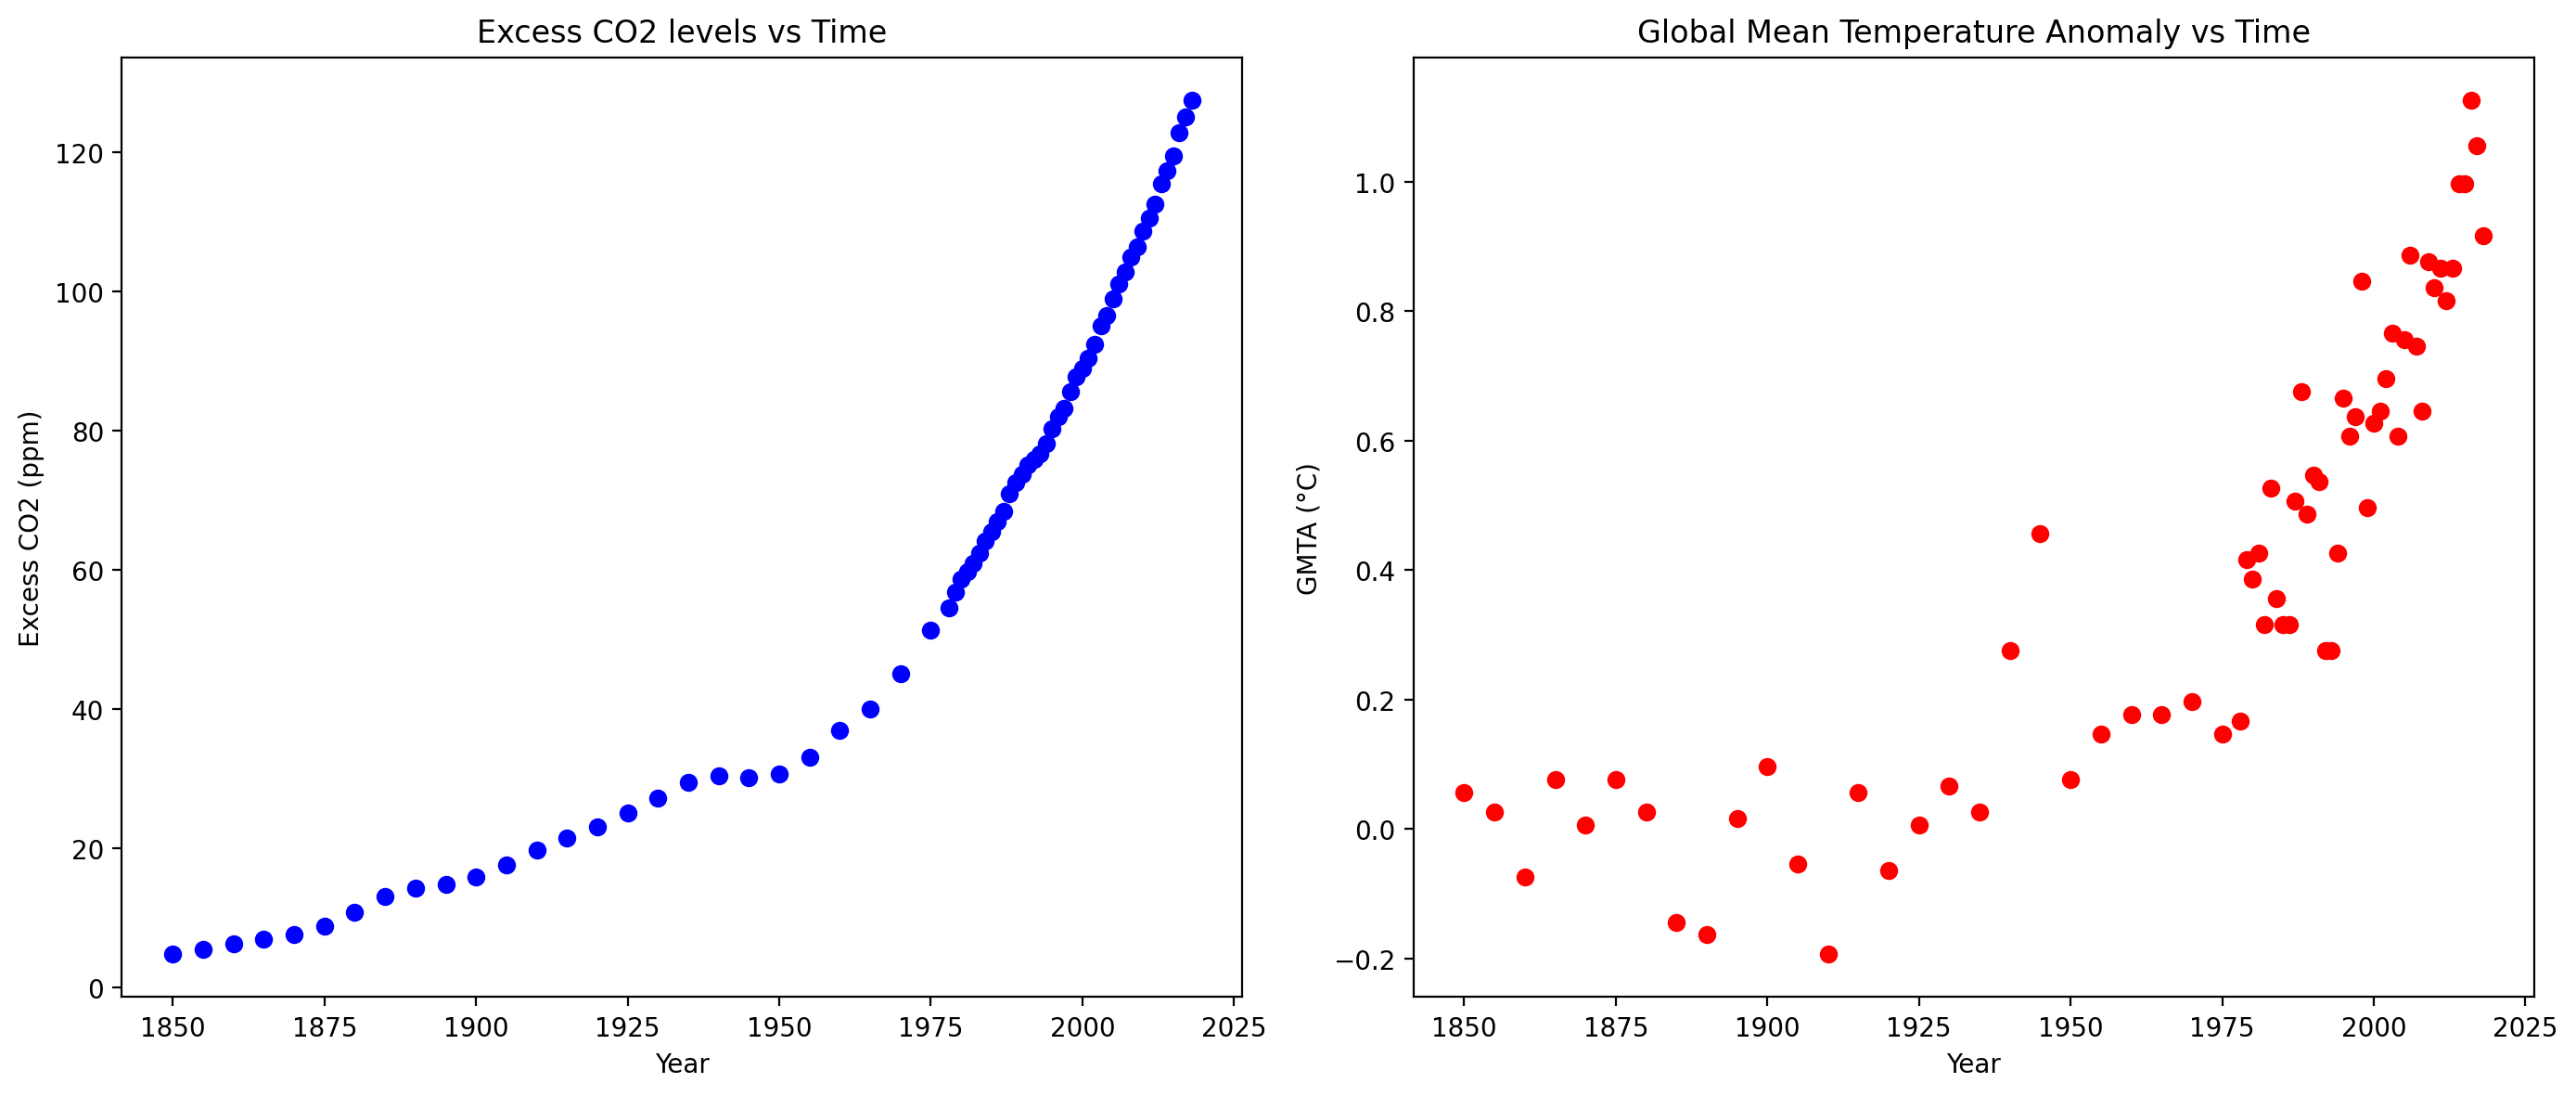

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting ECO2 levels vs time on the left
ax1.scatter(df2["Year"], df2["ECO2"], color='blue', label="ECO2")
ax1.set_title("Excess CO2 levels vs Time")
ax1.set_xlabel("Year")
ax1.set_ylabel("Excess CO2 (ppm)")

# Plotting GMTA levels vs time on the right
ax2.scatter(df2["Year"], df2["GMTA"], color='red', label="GMTA")
ax2.set_title("Global Mean Temperature Anomaly vs Time")
ax2.set_xlabel("Year")
ax2.set_ylabel("GMTA (°C)")

plt.tight_layout()
plt.savefig("plots/co2_global-temp_timeseries_raw.png")
plt.show()

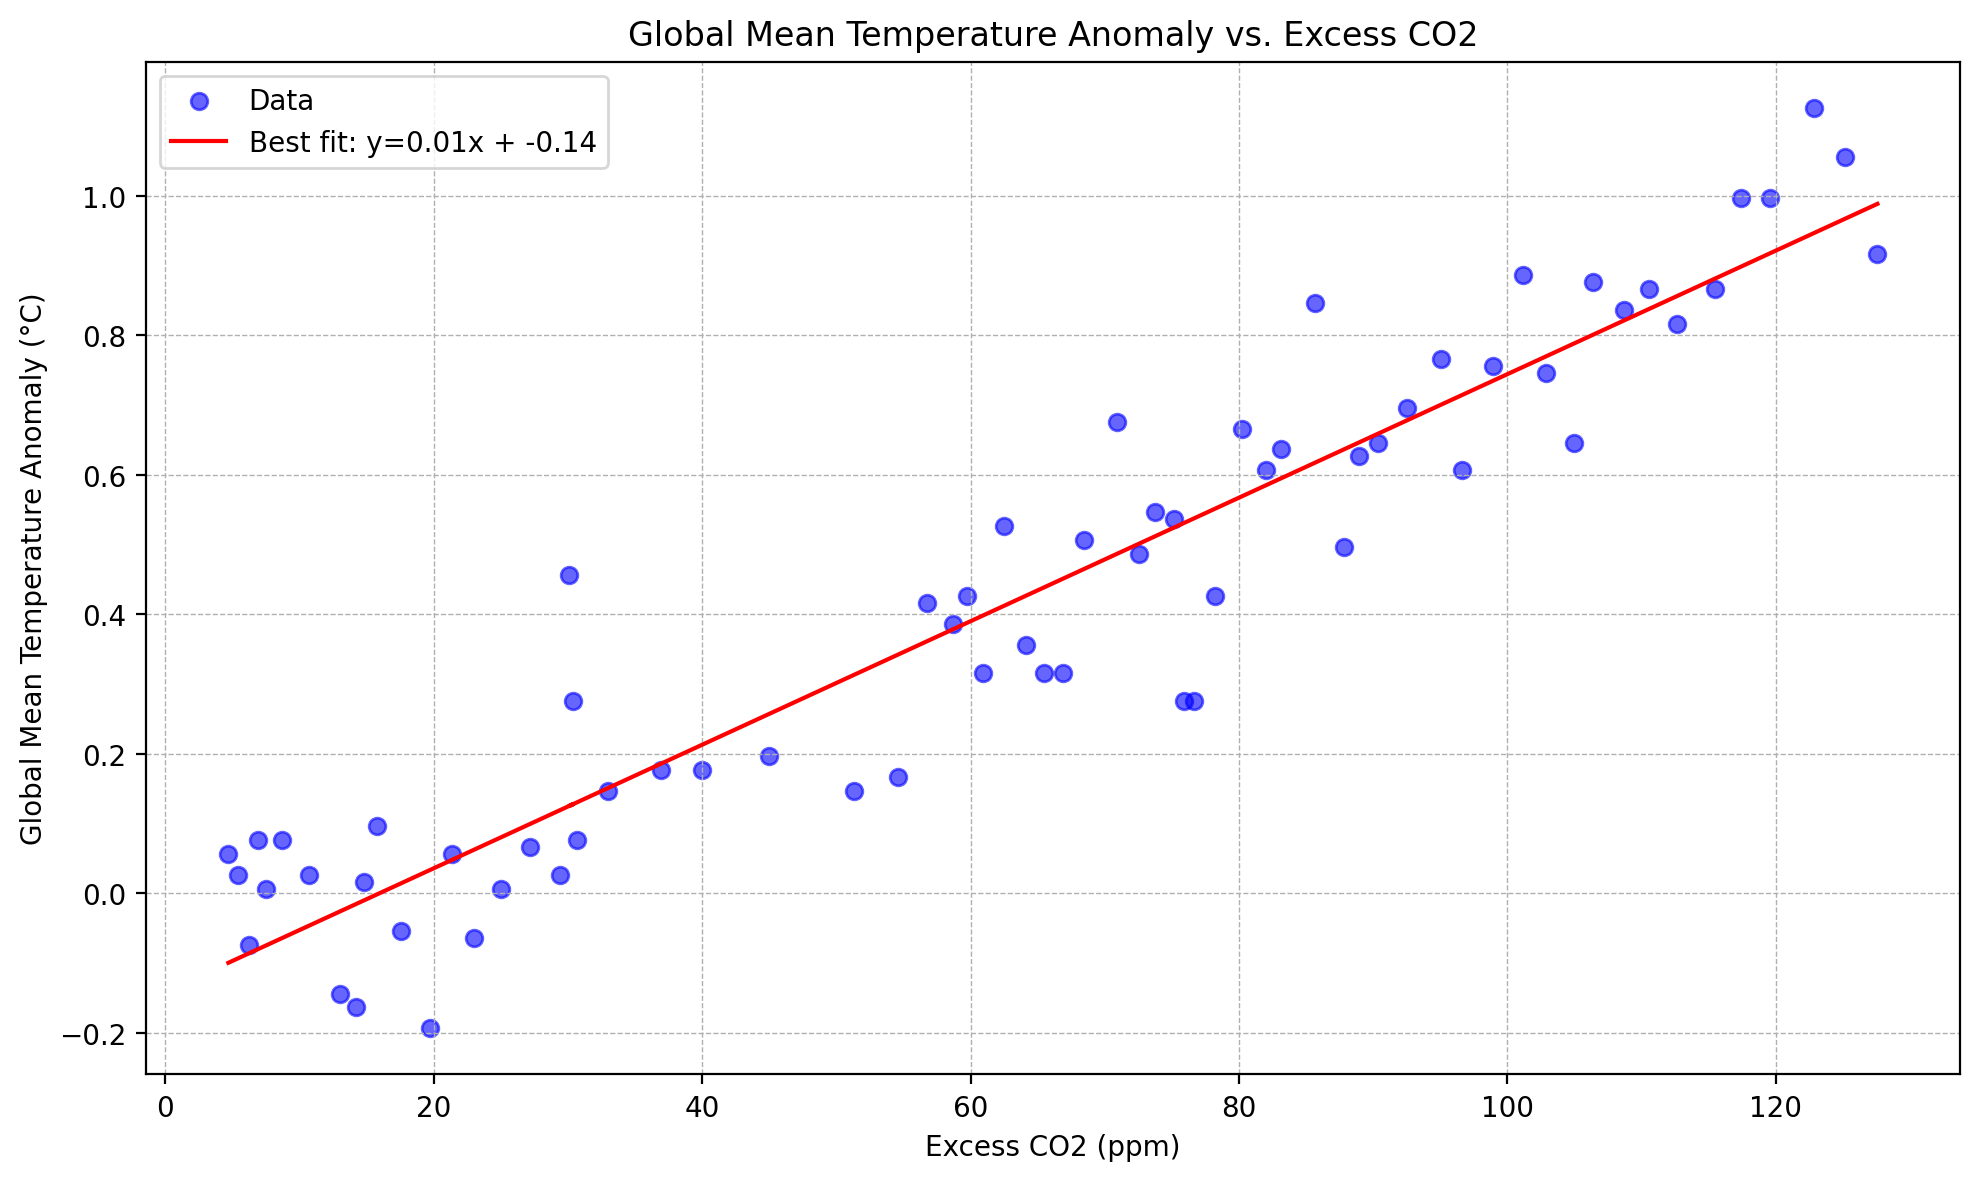

EVR: 0.8900
UVR: 0.1100


In [45]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['ECO2'], df2['GMTA'], color='blue', alpha=0.6, label='Data')
plt.title('Global Mean Temperature Anomaly vs. Excess CO2')
plt.xlabel('Excess CO2 (ppm)')
plt.ylabel('Global Mean Temperature Anomaly (°C)')

# If you wish to show a line of best fit, you can use np.polyfit
m, b = np.polyfit(df2['ECO2'], df2['GMTA'], 1)
plt.plot(df2['ECO2'], m*df2['ECO2'] + b, color='red', label=f'Best fit: y={m:.2f}x + {b:.2f}')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("plots/gmta_vs_eco2.png")
plt.show()

# Calculate EVR and UVR
y_pred = m*df2['ECO2'] + b
residuals = df2['GMTA'] - y_pred

total_variance = np.var(df2['GMTA'])
explained_variance = np.var(y_pred)
unexplained_variance = total_variance - explained_variance

EVR = explained_variance / total_variance
UVR = unexplained_variance / total_variance

# Print EVR and UVR
print(f"EVR: {EVR:.4f}")
print(f"UVR: {UVR:.4f}")

In [57]:
# Calculate standardized residuals
standard_deviation = np.std(residuals)
standardized_residuals = residuals / standard_deviation

# Get absolute values of standardized residuals
abs_standardized_residuals = np.abs(standardized_residuals)

# Sort by absolute value of standardized residuals in descending order
sorted_indices = np.argsort(abs_standardized_residuals)

# Output years and standardized residuals for the top few points (e.g., top 5)
top_n = 5
for i in range(len(sorted_indices)-1, len(sorted_indices)-6, -1):
    index = sorted_indices[i]
    year = df2["Year"].iloc[index]
    std_residual = standardized_residuals.iloc[index]
    print(f"Year: {year}, Standardized Residual: {std_residual:.4f}")

Year: 1945, Standardized Residual: 2.8797
Year: 1993, Standardized Residual: -2.2706
Year: 1992, Standardized Residual: -2.2144
Year: 1998, Standardized Residual: 1.9903
Year: 1910, Standardized Residual: -1.9740


In [62]:
df2_outliers = (
    df2[(df2["Year"] == 1945) | (df2["Year"] == 1993) | (df2["Year"] == 1992)]
)
df2_outliers.head()

,Year,GMTA,ECO2
19,1945,0.456364,30.10
40,1992,0.276364,75.90
41,1993,0.276364,76.63


In [63]:
df3 = df2[~((df2["Year"] == 1945) | (df2["Year"] == 1993) | (df2["Year"] == 1992))]
df3.sample(10)

,Year,GMTA,ECO2
27,1979,0.416364,56.74
9,1895,0.016364,14.80
64,2016,1.126364,122.87
60,2012,0.816364,112.64
30,1982,0.316364,60.92
38,1990,0.546364,73.72
26,1978,0.166364,54.60
18,1940,0.276364,30.40
20,1950,0.076364,30.70
2,1860,-0.073636,6.20


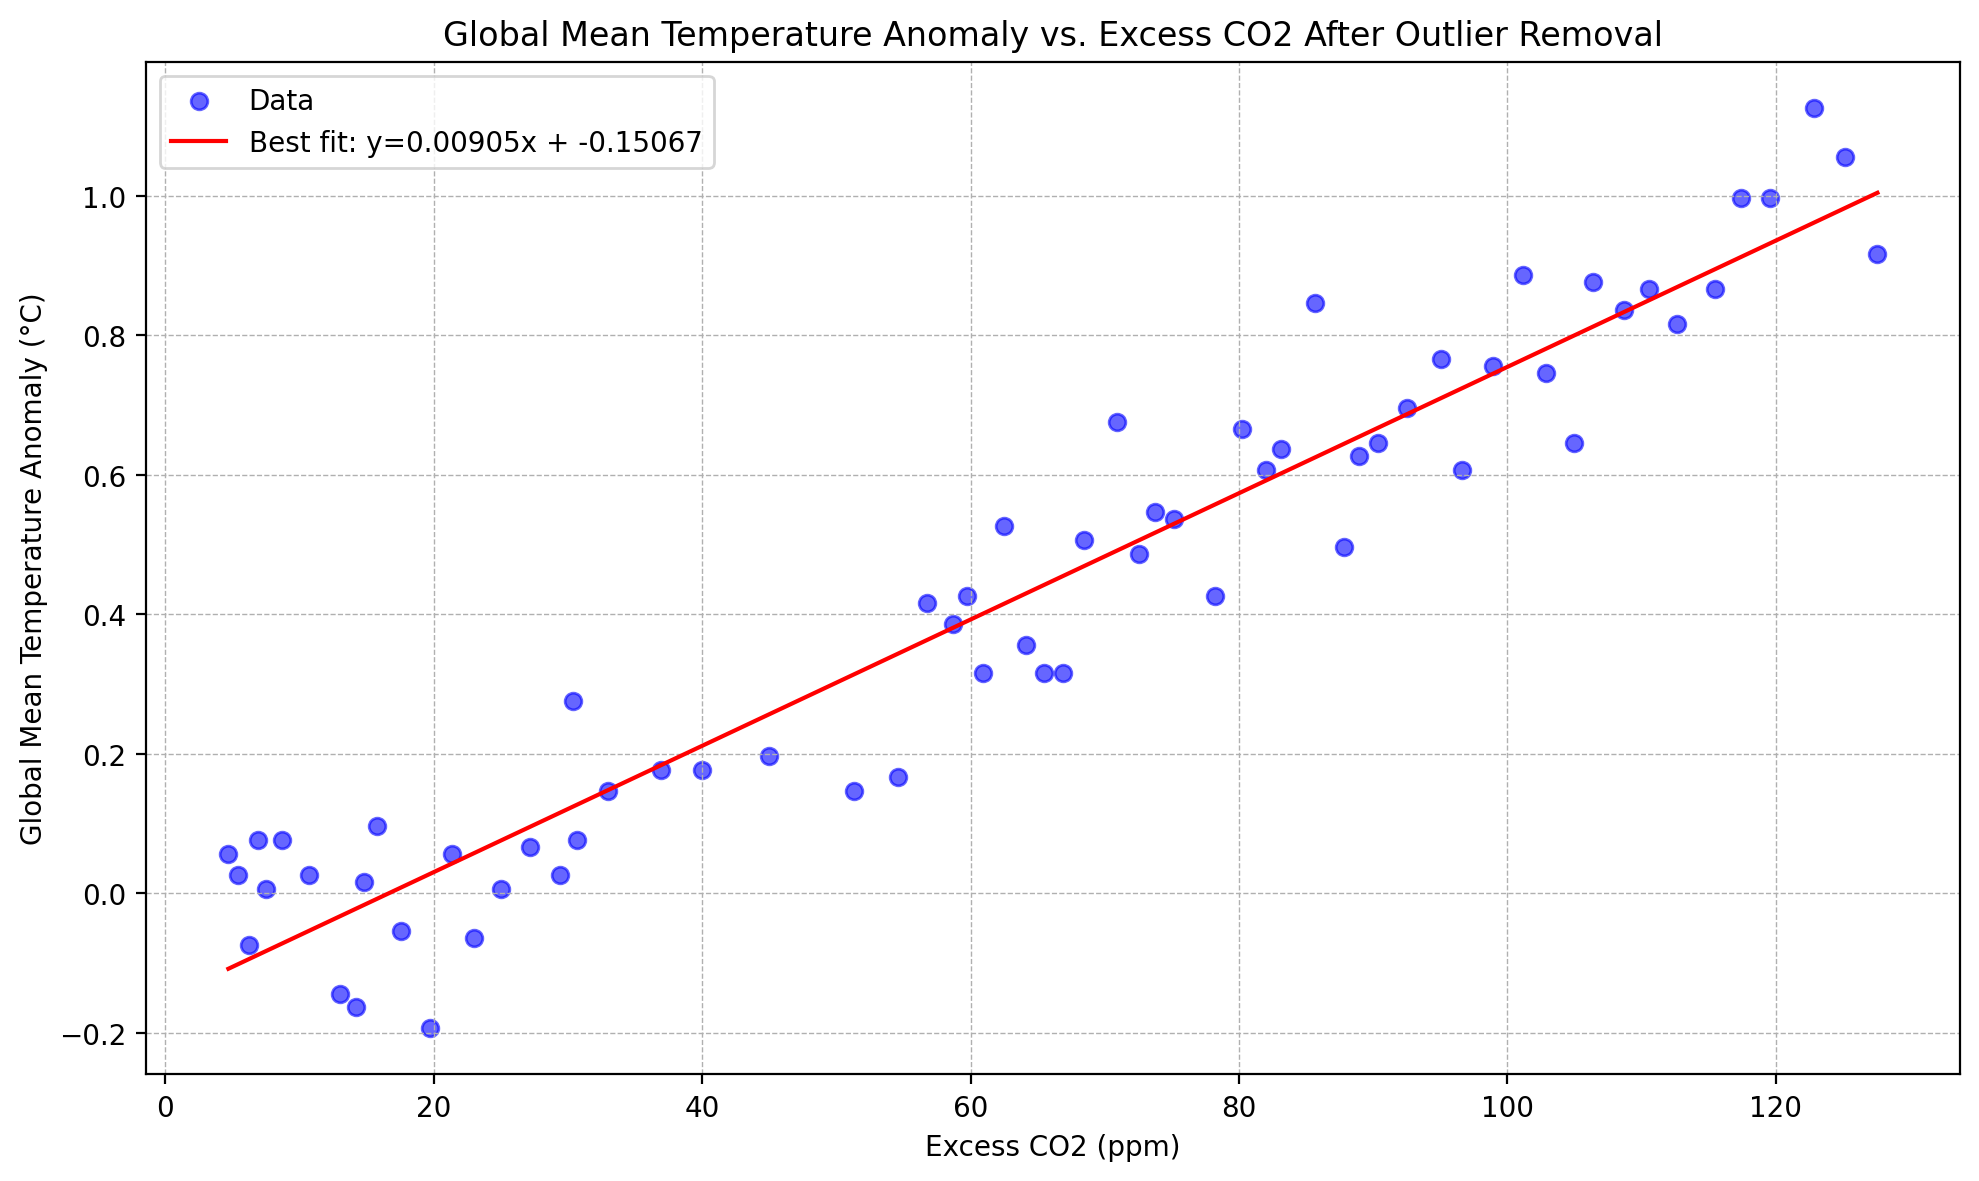

EVR: 0.9202
UVR: 0.0798


In [65]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df3['ECO2'], df3['GMTA'], color='blue', alpha=0.6, label='Data')
plt.title('Global Mean Temperature Anomaly vs. Excess CO2 After Outlier Removal')
plt.xlabel('Excess CO2 (ppm)')
plt.ylabel('Global Mean Temperature Anomaly (°C)')

# If you wish to show a line of best fit, you can use np.polyfit
m, b = np.polyfit(df3['ECO2'], df3['GMTA'], 1)
plt.plot(df3['ECO2'], m*df3['ECO2'] + b, color='red', label=f'Best fit: y={m:.5f}x + {b:.5f}')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("plots/gmta_vs_eco2_outlier_removal.png")
plt.show()

# Calculate EVR and UVR
y_pred = m*df3['ECO2'] + b
residuals = df3['GMTA'] - y_pred

total_variance = np.var(df3['GMTA'])
explained_variance = np.var(y_pred)
unexplained_variance = total_variance - explained_variance

EVR = explained_variance / total_variance
UVR = unexplained_variance / total_variance

# Print EVR and UVR
print(f"EVR: {EVR:.4f}")
print(f"UVR: {UVR:.4f}")

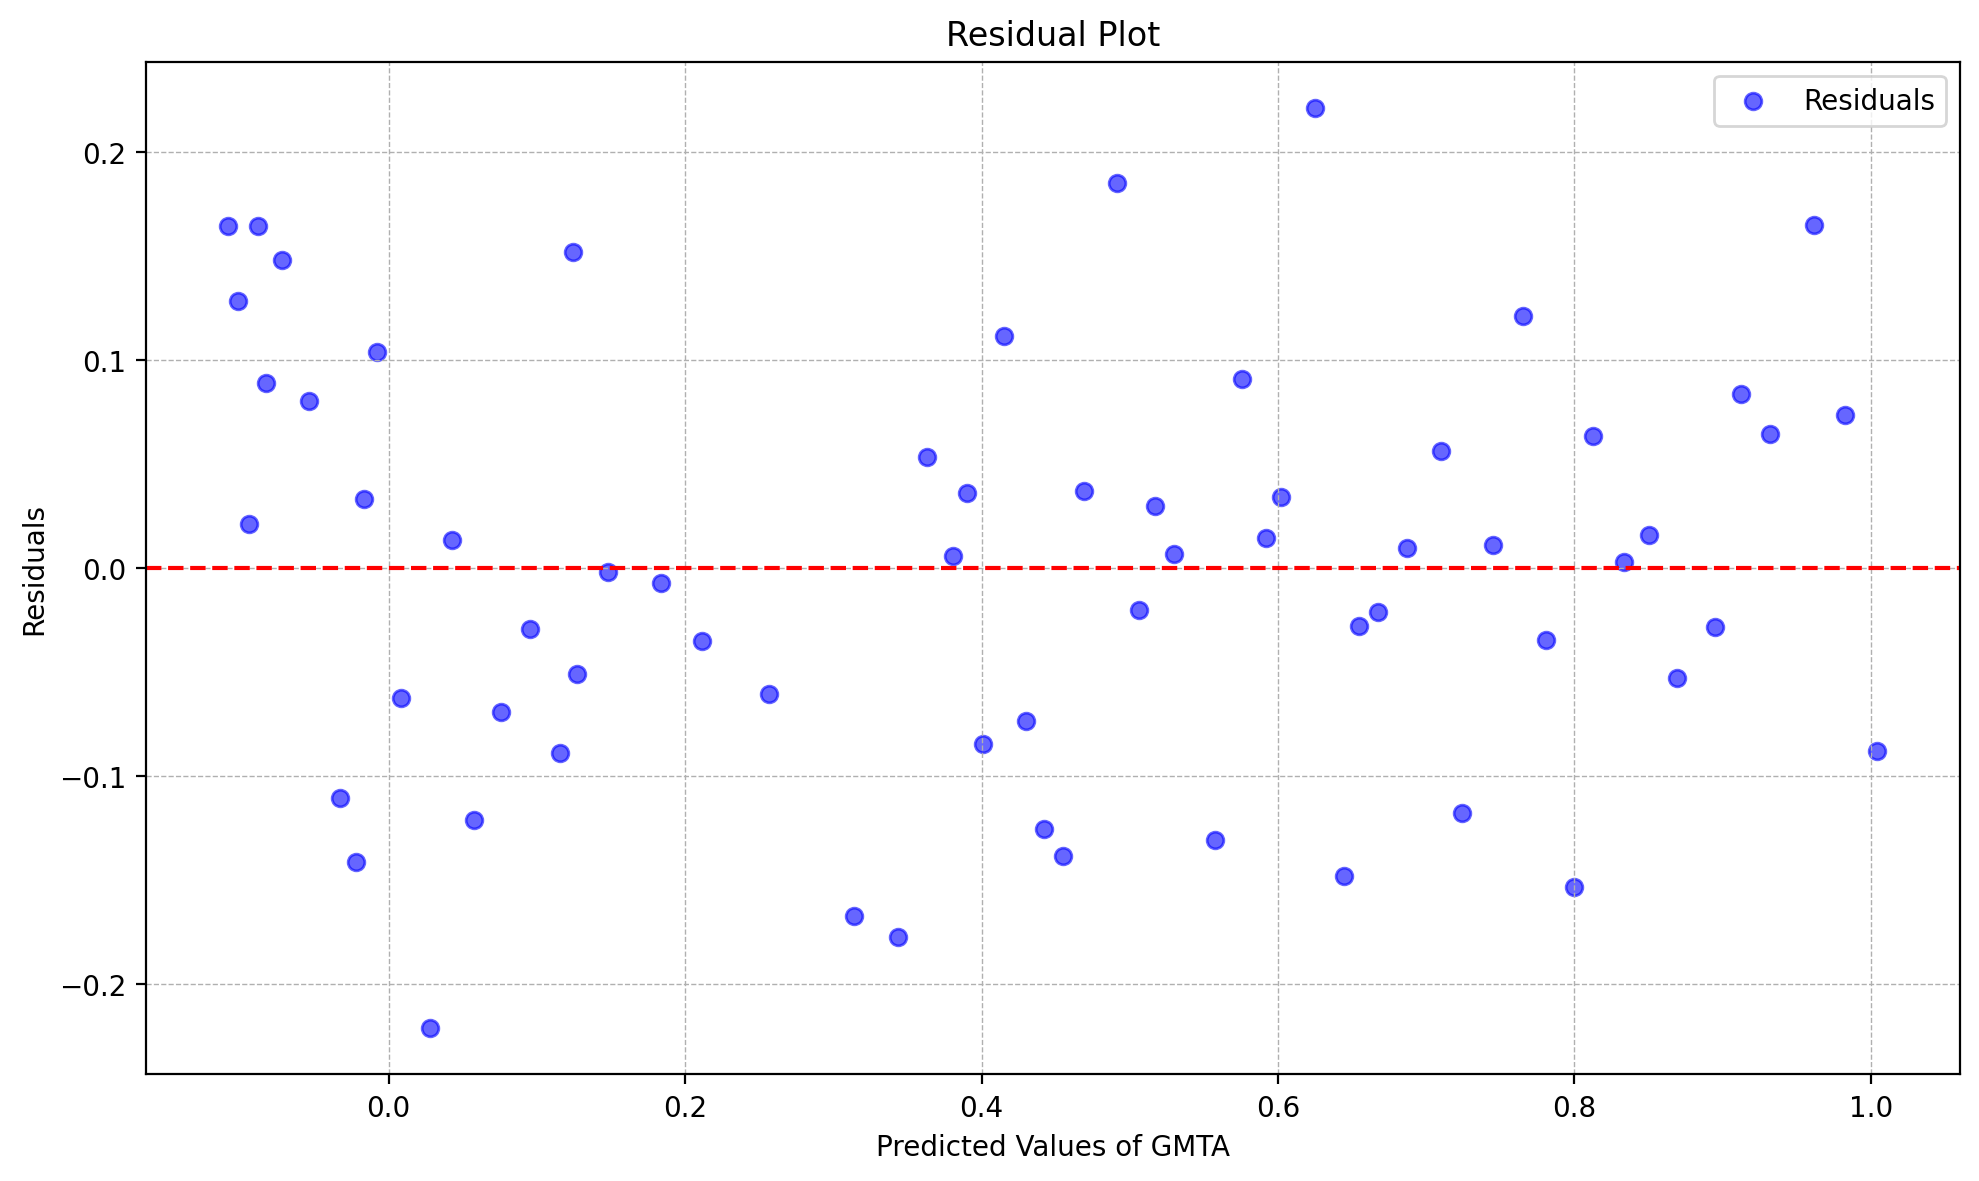

In [69]:
# Recompute the line of best fit using df3
m, b = np.polyfit(df3['ECO2'], df3['GMTA'], 1)

# Compute the predicted values and residuals
predicted_values = m*df3['ECO2'] + b
residuals = df3['GMTA'] - predicted_values

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--')  # Adding a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values of GMTA')
plt.ylabel('Residuals')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.savefig("plots/gmta_residuals.png")
plt.show()